In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mlfromscratch.utils as utils
import mlfromscratch.Supervised.multivariate_regression as regressor

In [2]:
# Generate random (linear) data
NUM_SAMPLES = 100
X, y = utils.generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T
print (data[:5])

[[ 0.         -7.55076635]
 [ 1.         36.05581642]
 [ 2.         36.47343804]
 [ 3.         51.44851477]
 [ 4.         60.7305517 ]]


In [3]:
# Load into a Pandas DataFrame
df = pd.DataFrame(data, columns=['X', 'y'])
X = df[['X']].values
y = df[['y']].values
df.head()

,X,y
0,0.0,-7.550766
1,1.0,36.055816
2,2.0,36.473438
3,3.0,51.448515
4,4.0,60.730552


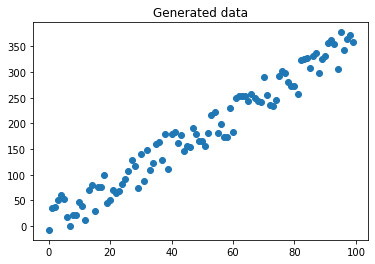

In [4]:
# Scatter plot
plt.title("Generated data")
plt.scatter(x=df['X'], y=df['y'])
plt.show()

In [5]:
X_train, X_test, y_train, y_test = utils.train_test_split(X, y, test_size=0.3, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(71, 1)
(29, 1)
(71, 1)
(29, 1)


In [ ]:
data_exp_std = utils.standardize(data_exp.values)
data_exp_std

In [ ]:
X = data_exp_std[:, 1:]
y = data_exp_std[:, 0]
print("X: ", X,"\ny:", y)

In [ ]:
regressor.linear_regression_model(X_train, y_train, X_test, y_test, 0.1, 10)

In [ ]:
w